# SABR Model Test Code

In [2]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import option_models as opt

In [30]:
### only run this when you changed the class definition
CODE_CHANGED = True
if( CODE_CHANGED ):
    imp.reload(opt)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [4]:
# Parameters
strike = np.linspace(75,125,num=25)
# strike = 110 # should work for scalar value 
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = 0.25
beta = 1

In [5]:
# Create model
sabr_bsm = opt.sabr.ModelHagan(texp, sigma, alpha=alpha, rho=rho, beta=beta)
sabr_bsm.__dict__

{'alpha': 0.3,
 'beta': 1,
 'bsm_model': <option_models.bsm.Model at 0x1bf3f199278>,
 'divr': 0,
 'intr': 0,
 'rho': 0.25,
 'sigma': 0.2,
 'texp': 1}

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward)
bsm_vol = sabr_bsm.bsm_vol(strike, forward)

price, bsm_vol

C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xx_zz[ind] = np.log( (yy[[ind]] + (zz[ind]-rho))/(1-rho) ) / zz[ind]


(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([0.19740451, 0.19730124, 0.19731138, 0.19742763, 0.19764276,
        0.19794962, 0.19834124, 0.19881083, 0.19935186, 0.19995804,
        0.2006234 , 0.20134229, 0.20210938, 0.20291966, 0.2037685 ,
        0.20465155, 0.20556483, 0.20650464, 0.2074676 , 0.20845059,
        0.20945078, 0.21046559, 0.21149265, 0.21252984, 0.21357521]))

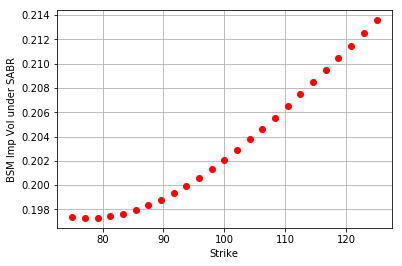

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [7]:
# implied vol (sigma in this case)
# you should get back the original sigma
sabr_bsm.impvol(price[11], strike[11], forward)

C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xx_zz[ind] = np.log( (yy[[ind]] + (zz[ind]-rho))/(1-rho) ) / zz[ind]


0.19999999999936008

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25
beta = 0

In [9]:
nvol = opt.sabr.norm_vol(strike, forward, texp, sigma, alpha=alpha, rho=rho)

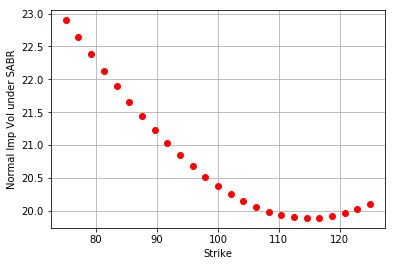

In [10]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [8]:
sabr_norm = opt.sabr.ModelNormalHagan(texp, sigma, alpha=alpha, rho=rho)
sabr_norm.__dict__

{'alpha': 0.5,
 'beta': 0.0,
 'divr': 0,
 'intr': 0,
 'normal_model': <option_models.normal.Model at 0x1bf3f199748>,
 'rho': -0.25,
 'sigma': 20,
 'texp': 1}

In [12]:
price = sabr_norm.price(strike, forward)
norm_vol = sabr_norm.norm_vol(strike, forward)
price, norm_vol

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([22.898288  , 22.63620745, 22.38073263, 22.1326082 , 21.89263645,
        21.66167534, 21.44063425, 21.2304669 , 21.03216098, 20.84672415,
        20.67516621, 20.5184775 , 20.37760417, 20.25342105, 20.1467038 ,
        20.05810179, 19.98811408, 19.93707021, 19.9051177 , 19.89221722,
        19.89814614, 19.92250965, 19.9647587 , 20.02421277, 20.10008575]))

In [13]:
# implied vol (e.g. sigma)
sabr_norm.impvol(price[11], strike[11], forward)

19.999999999999922

### (3) Smile calibration to 3 options

In [14]:
strike3 = np.array([90, 100, 110])
price3 = sabr_norm.price(strike3, forward)
norm_vol3 = sabr_norm.norm_vol(strike3, forward)

price3, norm_vol3

(array([14.37778096,  8.12948788,  3.9368394 ]),
 array([21.18982474, 20.37760417, 19.94575372]))

In [15]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(norm_vol3, strike3, forward, is_vol=True)

OK


C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:69: RuntimeWarning: invalid value encountered in sqrt
  yy = np.sqrt(1 + zeta*(zeta - 2*rho))
C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:73: RuntimeWarning: invalid value encountered in less
  ind = np.where(abs(zeta) < 1e-5)
C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:76: RuntimeWarning: invalid value encountered in greater_equal
  ind = np.where(zeta >= 1e-5)
C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:79: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(zeta <= -1e-5)


(20.000000000007592, 0.4999999999660513, -0.2500000000440035)

In [16]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

OK


C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:69: RuntimeWarning: invalid value encountered in sqrt
  yy = np.sqrt(1 + zeta*(zeta - 2*rho))
C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:73: RuntimeWarning: invalid value encountered in less
  ind = np.where(abs(zeta) < 1e-5)
C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:76: RuntimeWarning: invalid value encountered in greater_equal
  ind = np.where(zeta >= 1e-5)
C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:79: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(zeta <= -1e-5)


(20.000000000007592, 0.4999999999660513, -0.2500000000440035)

Below is same for sabr_bsm

In [17]:
strike3 = np.array([90, 100, 110])
price3 = price = sabr_bsm.price(strike3, forward)
bsm_vol3 = sabr_bsm.bsm_vol(strike3, forward)

price3, bsm_vol3

C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xx_zz[ind] = np.log( (yy[[ind]] + (zz[ind]-rho))/(1-rho) ) / zz[ind]


(array([13.55352055,  8.0492952 ,  4.52747026]),
 array([0.19891353, 0.20210938, 0.20631472]))

In [18]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(bsm_vol3, strike3, forward, is_vol=True)

OK


(0.2021092716366389, 0.0026399439850335986, 0.28215022571865406)

In [19]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

OK


C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:69: RuntimeWarning: invalid value encountered in sqrt
  yy = np.sqrt(1 + zeta*(zeta - 2*rho))
C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:73: RuntimeWarning: invalid value encountered in less
  ind = np.where(abs(zeta) < 1e-5)
C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:76: RuntimeWarning: invalid value encountered in greater_equal
  ind = np.where(zeta >= 1e-5)
C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:79: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(zeta <= -1e-5)


(20.075855950705407, 0.41872216195187545, 0.6616001018172085)

## 2. Pricing under MC method

In [20]:
strike = np.linspace(75,125,num=25)
forward = 100

In [13]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                  alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000001BF3F199278>}


In [22]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xx_zz[ind] = np.log( (yy[[ind]] + (zz[ind]-rho))/(1-rho) ) / zz[ind]


(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.74311574, 23.86100765, 22.03075674, 20.26756186, 18.57893867,
        16.9673993 , 15.44079918, 14.00094479, 12.65220743, 11.39612073,
        10.23396342,  9.16420958,  8.18215926,  7.29376418,  6.48537598,
         5.75629308,  5.10240671,  4.51810709,  3.99708378,  3.53290547,
         3.11852061,  2.75183232,  2.43119531,  2.14902688,  1.89764257]))

Repeat the same for beta = 0

In [12]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.texp, sabr_norm.sigma, 
                                   alpha=sabr_norm.alpha, rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000001BF3F199748>}


In [24]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.58911926, 24.75404653, 22.95369199, 21.19997722, 19.49430129,
        17.84083902, 16.24368894, 14.70839153, 13.24825842, 11.85790108,
        10.54487657,  9.31808437,  8.18117663,  7.1366871 ,  6.18341715,
         5.32159881,  4.54787942,  3.86437813,  3.25912006,  2.73054273,
         2.27823835,  1.89099367,  1.56349165,  1.28803308,  1.05978108]))

## 3. Pricing under conditional MC method

In [25]:
strike = np.linspace(75,125,num=25)
forward = 100

In [9]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                       alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000001BF3F199278>}


In [27]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_cmc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

C:\Users\lenovopc\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xx_zz[ind] = np.log( (yy[[ind]] + (zz[ind]-rho))/(1-rho) ) / zz[ind]


(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.55344231, 23.6764478 , 21.85504805, 20.09745422, 18.41142043,
        16.80390838, 15.28079965, 13.8466781 , 12.50469509, 11.2565211 ,
        10.10237791,  9.04113917,  8.07048291,  7.18707812,  6.38678824,
         5.66487649,  5.01620119,  4.43539275,  3.91700682,  3.45565157,
         3.0460886 ,  2.6833092 ,  2.36258819,  2.07951864,  1.83003048]))

Repeat the same for beta = 0

In [10]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.texp, sabr_norm.sigma, alpha=sabr_norm.alpha, 
                                        rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000001BF3F199748>}


In [29]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_cmc.price(strike, forward)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.57626916, 24.7383867 , 22.93759097, 21.17871362, 19.4669506 ,
        17.807806  , 16.20700676, 14.67038507, 13.20372699, 11.81258907,
        10.50208851,  9.27667745,  8.13991623,  7.09426472,  6.14091268,
         5.27966886,  4.50892459,  3.82570003,  3.22577165,  2.70386972,
         2.25392657,  1.86935113,  1.54330438,  1.26895319,  1.0396858 ]))

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [16]:
beta_MC = np.array([sabr_bsm_mc.price(strike, forward) for i in range(100)])
beta_CMC = np.array([sabr_bsm_cmc.price(strike, forward) for i in range(100)])
print(beta_MC.std(axis = 0), beta_CMC.std(axis = 0))
# there are something wrong, I need to reload the IPython to get the righr answer

[0.22739348 0.2246097  0.22124792 0.2174797  0.2131457  0.20833589
 0.2024192  0.1956361  0.18885785 0.18193256 0.17448063 0.16698325
 0.15999979 0.1526879  0.14548771 0.13799    0.13040971 0.12331396
 0.1165978  0.11000515 0.10336152 0.09678176 0.0906837  0.08475483
 0.07905797] [0.05905004 0.0590126  0.05887335 0.05860446 0.05818    0.05757812
 0.05678277 0.05578508 0.05458396 0.05318608 0.05160518 0.04986091
 0.04797737 0.0459815  0.04390152 0.04176558 0.03960061 0.03743146
 0.03528033 0.03316645 0.03110592 0.02911181 0.02719428 0.02536085
 0.02361666]


In [17]:
beta_MC  = np.array([sabr_norm_mc.price(strike, forward) for i in range(100)])
beta_CMC = np.array([sabr_norm_cmc.price(strike, forward) for i in range(100)])
print(beta_MC.std(axis = 0), beta_CMC.std(axis = 0))

[0.18973955 0.18638076 0.18255826 0.17890649 0.17539674 0.17108514
 0.16635014 0.16104768 0.15549656 0.14976767 0.14379788 0.13776225
 0.13120481 0.12452452 0.11794341 0.11155636 0.10501404 0.09798831
 0.09076409 0.08370641 0.07699369 0.07054566 0.064411   0.05845721
 0.05247368] [0.03176894 0.02998036 0.02811647 0.02619463 0.02423778 0.02227499
 0.02034175 0.01847978 0.01673581 0.0151586  0.01379335 0.01267321
 0.01180915 0.0111829  0.01074795 0.01044006 0.01019241 0.00994835
 0.00966808 0.00932962 0.00892624 0.00846241 0.00794967 0.00740307
 0.00683848]
